In [1]:
import numpy as np
import matplotlib.pyplot as plt

Constants: (natural units)

In [2]:
H0    = 1.5123e-33
T0    = 0.24e-3
G     = 1
GF    = 1.1664e-23
kB    = 1
Mpl   = 1.2211e28
rho_c = (3*(H0**2))/(8*np.pi*G)

Freeze out temperatures CDM and HDM for intastaneous freeze-out:

In [3]:
def T_fo_HDM(masses, scale):
    return pow(((scale*GF)**2)*Mpl, (-1/3))

def T_fo_HDM_equipart(masses, scale):
    return pow(3*kB*((scale*GF)**4)*(Mpl**2)/masses, (-1/7))

def T_fo_CDM(masses, scale):
    return masses / np.log(Mpl*((scale*GF)**2)*(masses**3)*pow(3*kB,(1/2)))

In [4]:
def numdens_fo_HDM(masses, T_fo):
    return pow(T_fo, 3)

def numdens_fo_CDM(masses, T_fo):
    return pow(masses*T_fo, (3/2))*np.exp(-masses/T_fo)

Relic abundance today:

In [45]:
m_min = 100e8
m_max = 100e10
n_points = 100
masses = np.logspace(np.log10(m_min), np.log10(m_max), num=n_points) # mass of the DM particle

scale_min = 0.8
scale_max = 1.2
n_curves = 5
scales = np.linspace(scale_min, scale_max, num=n_curves) # rescaling of the cross-section


T_fo_hot = [T_fo_HDM_equipart(masses, scale) for scale in scales]
n_fo_hot = [numdens_fo_HDM(masses, T_fo) for T_fo in T_fo_hot]

T_fo_cold = [T_fo_CDM(masses, scale) for scale in scales]
n_fo_cold = [numdens_fo_CDM(masses, T_fo) for T_fo in T_fo_cold]

CDM_input = list(zip(T_fo_cold, n_fo_cold))
HDM_input = list(zip(T_fo_hot, n_fo_hot))


### Cross-sections

cs_hot = [pow(T_hot,2)/(Mpl * n_hot) for (T_hot, n_hot) in HDM_input]
cs_cold = [pow(T_cold,2)/(Mpl * n_cold) for (T_cold, n_cold) in CDM_input]


OM_HDM = [(masses*(T0**3)*n_hot/(rho_c*(T_hot**3))) for (T_hot, n_hot) in HDM_input]
OM_CDM = [(masses*(T0**3)*n_cold/(rho_c*(T_cold**3))) for (T_cold, n_cold) in CDM_input]

In [44]:
arr1 = [1, 2, 3]
arr2 = [4, 5, 6]

test = list(zip(arr1, arr2))

for a, b in zip(arr1, arr2):
    print('a, b = ', a, b)
    
for (elem1, elem2) in test:
    print(elem1, elem2)

a, b =  1 4
a, b =  2 5
a, b =  3 6
1 4
2 5
3 6


In [32]:
CDM_input

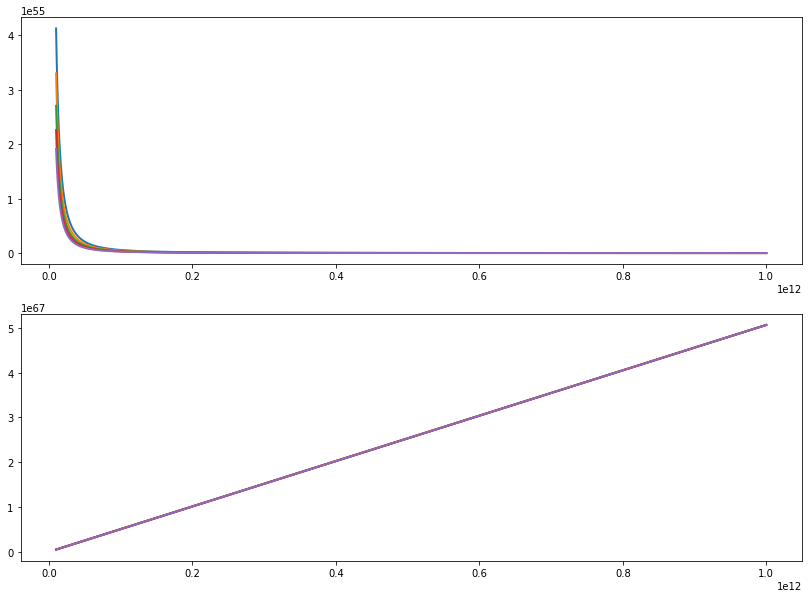

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,10))

for OM_cold in OM_CDM:
    ax1.plot(masses, OM_cold, lw=2)
    
for OM_hot in OM_HDM:
    ax2.plot(masses, OM_hot, lw=2)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=16)

# ax1.set_xlabel("x", fontsize=20)
# ax1.set_ylabel("probability density", fontsize=20)
# ax1.tick_params(axis='x', labelsize=20)
# ax1.tick_params(axis='y', labelsize=20)
# ax2.set_xlabel("x", fontsize=20)
# ax2.set_ylabel("probability", fontsize=20)
# ax2.tick_params(axis='x', labelsize=20)
# ax2.tick_params(axis='y', labelsize=20)
plt.show()

In [2]:
def g_s(T):
    
    # Evolution of relativistic
    # degrees of freedom (T in eV).
    
    decoupling_T = np.array([173*10**9, 90*10**9, 4*10**9, 10**9, 10**8, 511*10**3])
    
    
    if T <= decoupling_T[0]:
        g_s = 106.75
        
    elif decoupling_T[0] < T <= decoupling_T[1]:
        g_s = 96.25
    
    elif decoupling_T[1] < T <= decoupling_T[2]:
        g_s = 86.25
    
    elif decoupling_T[2] < T <= decoupling_T[3]:
        g_s = 75.75
    
    elif decoupling_T[3] < T <= decoupling_T[4]:
        g_s = 17.25
        
    elif decoupling_T[4] < T <= decoupling_T[5]:
        g_s = 10.75
        
    elif T > decoupling_T[5]:
        g_s = 3.94
    
    
    return g_s

In [3]:
def H(T):
    
    # Hubble constant in terms
    # of the temperature.
    
    density = (g_s*T**4)*(np.pi**2)/(30)
    
    return np.sqrt(8*np.pi*G*density/3)